# João Pedro Araujo

# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.4.0 


## Funções úteis

In [2]:
def plot_hists(img, plt):
    """
        Plota o histograma de cada um dos canais RGB
        img - imagem RGB
        plt - objeto matplotlib
    """
    plt.figure(figsize=(20,10)); 
    img_h = img[:,:,0]
    img_s = img[:,:,1]
    img_v = img[:,:,2]
    histo_plot(img_h, "r","R", plt);
    histo_plot(img_s, "g","G", plt);
    histo_plot(img_v, "b","B", plt);

def make_hist(img_255, c, label, plt):
    """ img_255 - uma imagem com 3 canais de 0 até 255
        c a cor do plot
        label - o label do gráfico
        plt - matplotlib.pyplot
    """
    hist,bins = np.histogram(img_255.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    # plt.plot(cdf_normalized, color = c)
    plt.hist(img_255.flatten(),256,[0,256], color = c)
    plt.xlim([0,256])
    plt.legend(label, loc = 'upper left')
    plt.plot()

def histo_plot(img, cor, label, plt):
    """
        img - imagem
        cor - cor
        plt - matplotlib.pyplot object

    """
    plt.figure(figsize=(10,5))
    make_hist(img, cor, label, plt)
    plt.show()
    plt.figure(figsize=(10,5))
    plt.imshow(img, cmap="Greys_r")#, vmin=0, vmax=255)    
    plt.title(label)

# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

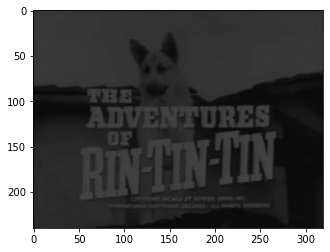

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

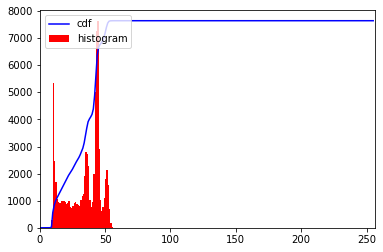

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [9]:
saida = rintin_gray.copy()

In [11]:
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = (rintin_gray[i][j]-8) * 258/48

In [74]:
#OUTRO METODO:
#Solução de um colega
#diferente do exemplo mas gera mesmo resultado
#
#-----------------------------------------
#
#rintin_gray.min() #min = 8
#rintin_gray.max() #max = 58
#y = (rintin_gray - 8) * 258/48
#
#-----------------------------------------




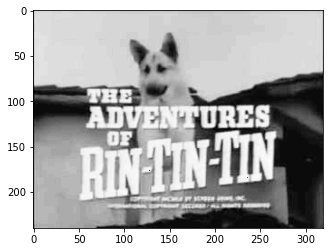

In [48]:
#Saida criada
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

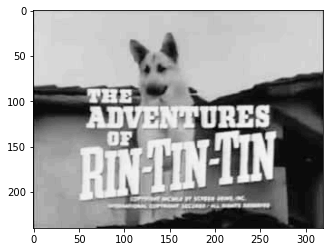

In [49]:
#imagem alterada automaticamente
plt.imshow(rintin_gray, cmap="Greys_r")

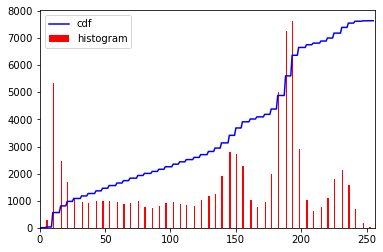

In [73]:
#histograma da saida


hist,bins = np.histogram(saida.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


<Figure size 1440x720 with 0 Axes>

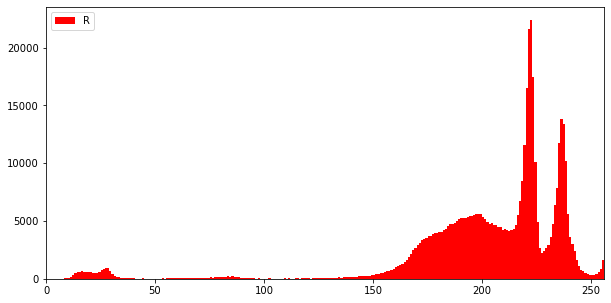

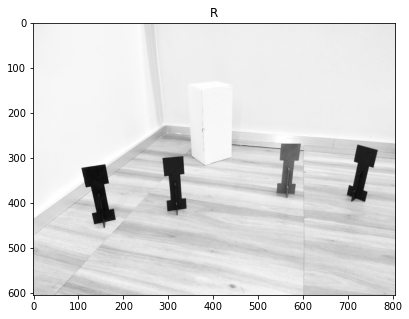

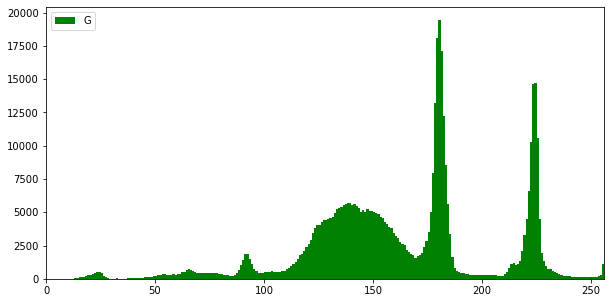

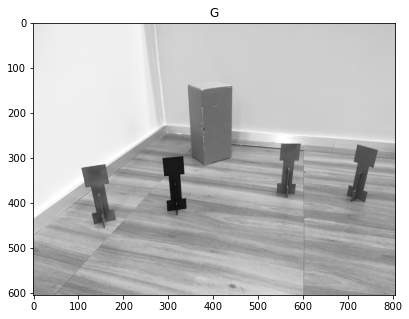

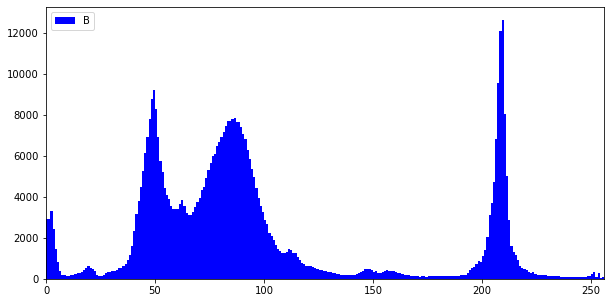

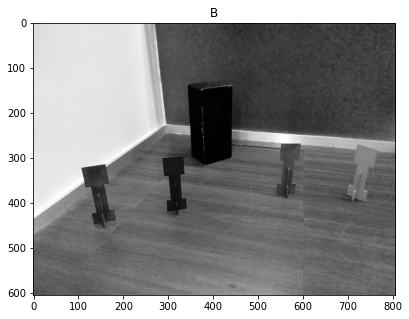

In [14]:
cena = cv2.imread("cena_canto_sala.jpg")
cena = cv2.cvtColor(cena, cv2.COLOR_BGR2RGB)
plot_hists(cena, plt)


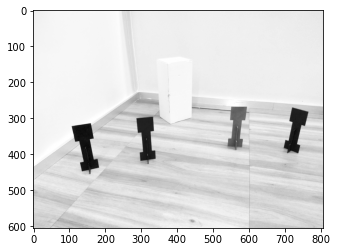

In [27]:
#apenas camada vermelha

c_r = cena[:,:,0]
plt.imshow(c_r, cmap='Greys_r')

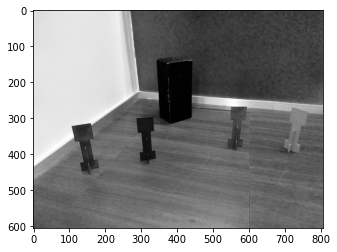

In [75]:
#apenas camada azul

c_b = cena[:,:,2]
plt.imshow(c_b, cmap='Greys_r')

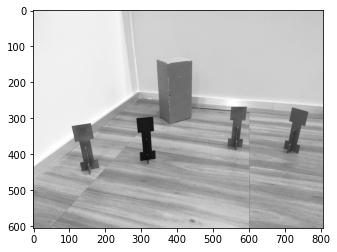

In [38]:
#apenas camada verde

c_g = cena[:,:,1]
plt.imshow(c_g, cmap='Greys_r')

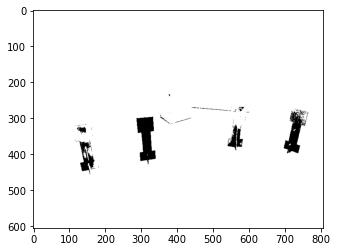

In [45]:
#--------------------------------------------------
#TESTE PARA O VERDE
#--------------------------------------------------

#
#
#
#cena_nova = cena.copy()
#
#for i in range(cena.shape[0]):
#    for k in range(cena.shape[1]):
#        #se tiver tempo encrontrar valores melhores 
#        #no hist por meio de funcoes
#        if c_g[i][k] > 65 and c_g[i][k] < 300: 
#            cena_nova[i][k] = 255
#        else:
#            cena_nova[i][k] = 0
#            
#plt.imshow(cena_nova, cmap='Greys_r')

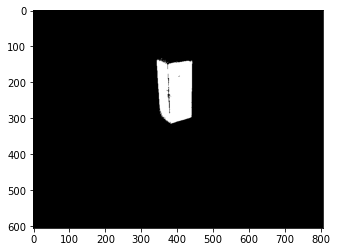

In [46]:
cena_nova = cena.copy()

for i in range(cena.shape[0]):
    for k in range(cena.shape[1]):
        #se tiver tempo encrontrar valores melhores 
        #no hist por meio de funcoes
        #  nao deu tempo :(  #
        if c_r[i][k] > 210 and c_b[i][k] < 20: 
            cena_nova[i][k] = 255
        else:
            cena_nova[i][k] = 0
            
plt.imshow(cena_nova, cmap='Greys_r')

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

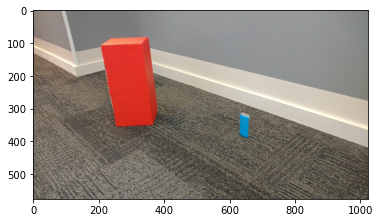

In [50]:
arq = hall = cv2.imread("hall_box_battery_atividade3.png")
hall_rgb = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)
plt.imshow(hall_rgb)

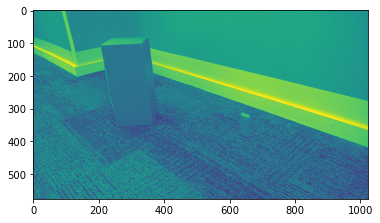

In [51]:
hall_gray = cv2.cvtColor(hall_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(hall_gray)

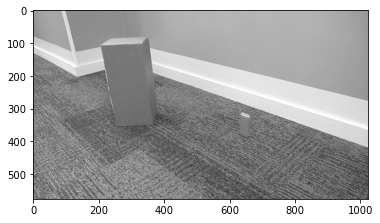

In [52]:
plt.imshow(hall_gray, cmap="Greys_r")

In [70]:
corredor_f = hall_gray.copy()

for i in range(hall_gray.shape[0]):
    for e in range(hall_gray.shape[1]):
        if i==0 or i==hall_gray.shape[0]-1 or i==hall_gray.shape[0]+1:
            corredor_f[i][e] = hall_gray[i][e]
        else:
            corredor_f[i][e] = abs(int(hall_gray[i+1][e]) - int(hall_gray[i-1][e]))

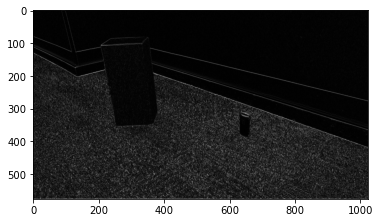

In [71]:
plt.imshow(corredor_f, cmap="Greys_r",vmin = 0, vmax = 255)